In [1]:
from saga.experiment.benchmarking.parametric import ParametricExperiment
import logging
import random
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import clear_output

%matplotlib inline

# Set random seed for reproducibility
random.seed(0)
np.random.seed(0)

logging.basicConfig(level=logging.WARNING)

In [2]:
# Step 1: Define the experiment
experiment = ParametricExperiment(trim=100) # trim to 100 instances per dataset

In [3]:
# Step 2: Prepare the datasets for the experiment
experiment.prepare(download_url="https://zenodo.org/records/10967223/files/dataset.zip?download=1")

Dataset already exists in /home/jared/.saga/datasets/parametric
Using existing shuffled datasets in /home/jared/.saga/datasets/parametric/shuffled


In [4]:
total_evals = 72 * 16 * 1  # Total evaluations
completed_evals = 0   # Initial completed evaluations
start_time = datetime.now()  # Start time of the experiment
last_update_percent = -100 # Last update percentage

def print_progress(*args, **kwargs):
    global completed_evals, total_evals, start_time, last_update_percent
    completed_evals += 1  # Increment the count of completed evaluations
    percent_complete = completed_evals / total_evals  # Calculate percentage completion

    if last_update_percent + 0.01 <= percent_complete:  # Update progress if more than 1% progress has been made
        now = datetime.now()  # Current time
        elapsed_time = (now - start_time).total_seconds()  # Elapsed time in seconds
        if percent_complete > 0:
            estimated_completion_time = start_time + timedelta(seconds=elapsed_time / percent_complete)  # Estimated completion time
        else:
            estimated_completion_time = now + timedelta(hours=1)  # Default to 1 hour more if percent_complete is 0

        estimated_completion_time_str = estimated_completion_time.strftime("%Y-%m-%d %H:%M:%S")  # Format completion time

        # Generate progress report
        prog_report = {
            "completed": f"{completed_evals}",
            "total": f"{total_evals}",
            "progress": f"{percent_complete * 100:.2f}%",
            "elapsed time": str(timedelta(seconds=elapsed_time)),
            "estimated remaining time": str(timedelta(seconds=elapsed_time / percent_complete - elapsed_time)) if percent_complete > 0 else "calculating...",
            "current time": now.strftime("%Y-%m-%d %H:%M:%S"),
            "estimated completion time": estimated_completion_time_str
        }
        prog_report_str = "\n".join([f"{k}: {v}" for k, v in prog_report.items()])  # Create a string of the progress report

        # Clear the console and print the progress report
        clear_output(wait=True)
        print(prog_report_str, flush=True)  # Print new progress report

        last_update_percent = percent_complete  # Update the last update percentage

# Assume `experiment.run(progress_callback=print_progress)` initiates the task and calls `print_progress` regularly.
experiment.run(progress_callback=print_progress)  # Run the experiment

completed: 8409
total: 1152
progress: 729.95%
elapsed time: 0:00:37.870507
estimated remaining time: -1 day, 23:59:27.317604
current time: 2024-04-15 14:16:32
estimated completion time: 2024-04-15 14:15:59


KeyboardInterrupt: 

In [ ]:
# Step 4: Analyze the results
experiment.analyze(
    filetype="png",
    showfliers=False,
    do_pareto_plots=True,
    do_main_effect_plots=False,
    do_dataset_plots=False,
    do_interaction_plots=False
)

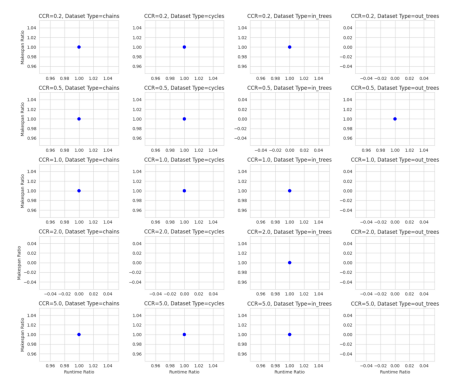

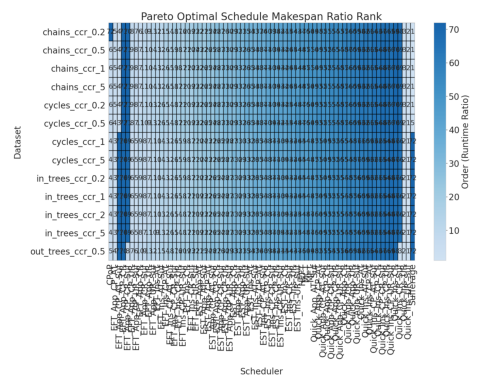

In [ ]:
pareto_scatter_path = experiment.outputdir / "pareto_scatter.png"
img = plt.imread(pareto_scatter_path)
img_plot = plt.imshow(img)
plt.axis("off")
plt.show()

pareto_chart_path = experiment.outputdir / "pareto_chart.png"
img = plt.imread(pareto_chart_path)
img_plot = plt.imshow(img)
plt.axis("off")
plt.show()

# Generate All Plots
Generate all other plots and see the results in the output directory.

KeyboardInterrupt: 

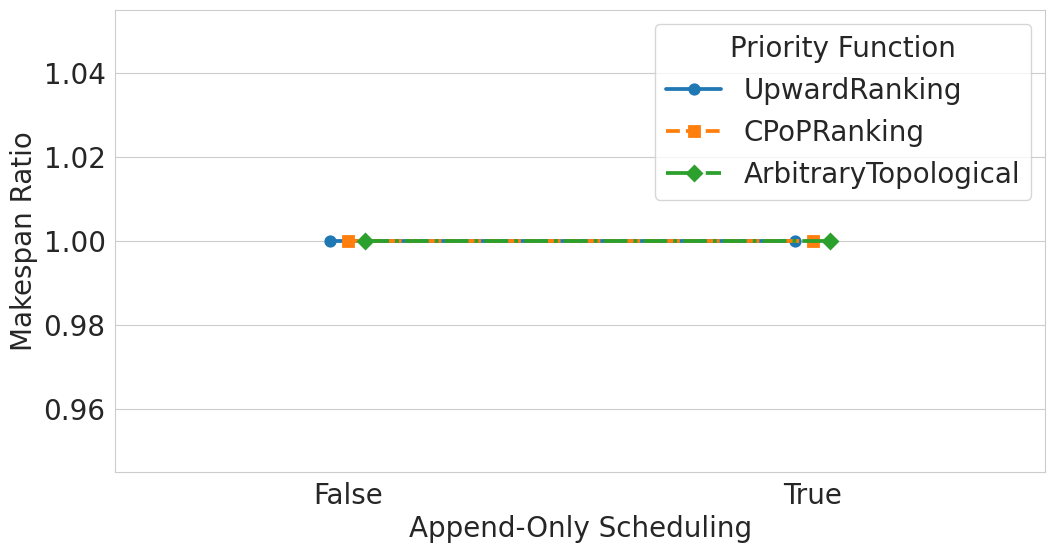

In [ ]:
experiment.analyze(
    filetype="png",
    showfliers=False,
    do_pareto_plots=True,
    do_main_effect_plots=True,
    do_dataset_plots=True,
    do_interaction_plots=True
)